## **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
# from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **Mounting the Dataset**


In [2]:
# drive.mount('/content/drive')

In [3]:
# path='/content/drive/MyDrive/makemytrip__data.csv'
# df = pd.read_csv(path,on_bad_lines='skip')


In [4]:
df = pd.read_csv(r"C:\Users\aniru\OneDrive\Documents\SRC\SRC 6\makemytrip__data.csv", on_bad_lines='skip')

In [5]:
# Display the first few rows of the dataset
df.head()

,Uniq Id,Crawl Timestamp,Package Name,Page Url,Package Type,Company,Destination,Itinerary,Places Covered,Travel Date,...,Airline,Flight Stops,Onwards Return Flight Time,Meals,Price Per Two Persons,Per Person Price,Sightseeing Places Covered,Initial Payment For Booking,Cancellation Rules,Date Change Rules
0,0eaaee0a8a6ba47cfc9f6e6852fcf9f0,2019-09-19 23:07:23 +0000,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Gangtok|Lachung|Gangtok|Darjeeling,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,02-10-2019,...,IndiGo,NaN,14 : 00-16 : 05,NaN,71350,35675.0,Baba Mandir | MG Road - Walk | Visit to Lake ...,NaN,Cancellation any time after making the 1st pay...,NaN
1,c782c902e6d370153361d708bb2bca64,2019-09-25 16:15:44 +0000,A Relaxing holiday to Kerala - Free Speed Boat...,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,02-10-2019,...,Spicejet|IndiGo,NaN,15 : 45-17 : 45|10 : 50-13 : 00,NaN,32864,16432.0,Dutch Palace | Jewish Synagogue | St. Francis...,NaN,Cancellation any time after making the 1st pay...,NaN
2,1087ed9303d0ac724460088a5920065d,2019-09-26 04:18:42 +0000,Experiential Manali from Chandigarh (Candid Ph...,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Manali,3N Manali,Manali,24-10-2019,...,NaN,NaN,NaN,NaN,12045,6022.5,Vashishth Kund | Hadimba Temple | Tibetan Mon...,NaN,This cancellation policy is applicable for boo...,NaN
3,3bda4788836d573910f605154ba949dc,2019-09-24 11:46:20 +0000,Stunning Kashmir Holiday,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Gulmarg|Pahalgam|Srinagar,1N Gulmarg . 2N Pahalgam . 2N Srinagar,Gulmarg|Pahalgam|Srinagar,26-10-2019,...,IndiGo|IndiGo,NaN,06 : 30-09 : 10|12 : 45-14 : 20,NaN,31933,15966.5,Gondola Point | Avantipura Ruins | Mughal Gar...,NaN,Cancellation any time after making the 1st pay...,NaN
4,aab612682c998bde97e040b212cd5689,2019-09-25 12:45:50 +0000,Best of Holiday in Himachal from Chandigarh,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,2N Shimla . 3N Manali . 2N Dharamshala . 2N Da...,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,13-10-2019,...,NaN,NaN,NaN,NaN,35725,17862.5,Pinjore Gardens | Mall road | Kufri | Indira ...,NaN,Cancellation any time after making the 1st pay...,NaN


In [6]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (27454, 22)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27454 entries, 0 to 27453
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniq Id                      27454 non-null  object 
 1   Crawl Timestamp              27454 non-null  object 
 2   Package Name                 27454 non-null  object 
 3   Page Url                     27454 non-null  object 
 4   Package Type                 27454 non-null  object 
 5   Company                      27454 non-null  object 
 6   Destination                  27454 non-null  object 
 7   Itinerary                    27454 non-null  object 
 8   Places Covered               27454 non-null  object 
 9   Travel Date                  27454 non-null  object 
 10  Hotel Details                23287 non-null  object 
 11  Start City                   27454 non-null  object 
 12  Airline                      21301 non-null  object 
 13  Flight Stops    

## **Data Statistics**

In [8]:
# Summary statistics of numeric columns
df.describe() #Continuous variable

,Flight Stops,Meals,Price Per Two Persons,Per Person Price,Initial Payment For Booking,Date Change Rules
count,0.0,0.0,27454.000000,27454.000000,0.0,0.0
mean,NaN,NaN,39517.943688,19758.971844,NaN,NaN
std,NaN,NaN,23067.431040,11533.715520,NaN,NaN
min,NaN,NaN,1582.000000,791.000000,NaN,NaN
25%,NaN,NaN,24549.500000,12274.750000,NaN,NaN
50%,NaN,NaN,34921.500000,17460.750000,NaN,NaN
75%,NaN,NaN,49342.750000,24671.375000,NaN,NaN
max,NaN,NaN,342125.000000,171062.500000,NaN,NaN


In [9]:
df.describe(include='all')

,Uniq Id,Crawl Timestamp,Package Name,Page Url,Package Type,Company,Destination,Itinerary,Places Covered,Travel Date,...,Airline,Flight Stops,Onwards Return Flight Time,Meals,Price Per Two Persons,Per Person Price,Sightseeing Places Covered,Initial Payment For Booking,Cancellation Rules,Date Change Rules
count,27454,27454,27454,27454,27454,27454,27454,27454,27454,27454,...,21301,0.0,21301,0.0,27454.000000,27454.000000,25327,0.0,26316,0.0
unique,27454,25974,2231,26628,1092,6,566,1190,895,279,...,341,NaN,2110,NaN,NaN,NaN,1771,NaN,8,NaN
top,0eaaee0a8a6ba47cfc9f6e6852fcf9f0,2019-09-20 04:24:31 +0000,Amazing Kerala,The Grand Leoney Resort:4.2,Deluxe,Makemytrip,Goa,3N Goa,Goa,16-10-2019,...,IndiGo,NaN,09 : 20-11 : 25,NaN,NaN,NaN,Tata Tea Museum | Eravikulam national park,NaN,Cancellation any time after making the 1st pay...,NaN
freq,1,6,44,13,7442,26367,1301,586,1301,908,...,4968,NaN,641,NaN,NaN,NaN,210,NaN,22700,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39517.943688,19758.971844,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23067.431040,11533.715520,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1582.000000,791.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24549.500000,12274.750000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34921.500000,17460.750000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,49342.750000,24671.375000,NaN,NaN,NaN,NaN


In [10]:
# Check for missing values
df.isnull().sum()

Uniq Id                            0
Crawl Timestamp                    0
Package Name                       0
Page Url                           0
Package Type                       0
Company                            0
Destination                        0
Itinerary                          0
Places Covered                     0
Travel Date                        0
Hotel Details                   4167
Start City                         0
Airline                         6153
Flight Stops                   27454
Onwards Return Flight Time      6153
Meals                          27454
Price Per Two Persons              0
Per Person Price                   0
Sightseeing Places Covered      2127
Initial Payment For Booking    27454
Cancellation Rules              1138
Date Change Rules              27454
dtype: int64

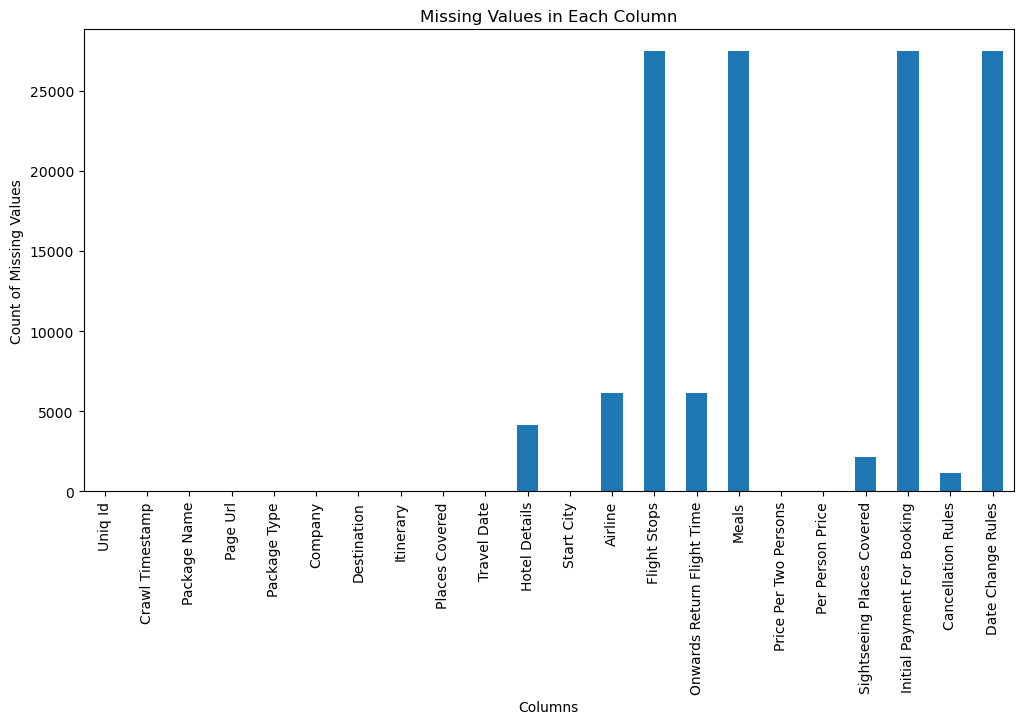

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'df'
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Create a bar chart to visualize missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.show()

**Inference from the plot:**

- The columns "Flight Stops," "Meals," "Initial Payment For Booking," "Date Change Rules," "Unnamed: 22," and "Unnamed: 23" contain a significant number of missing values, nearly equal to the dataset's length.

- Since these columns are either entirely empty or have a vast majority of missing values (6 columns in total), it is advisable to drop them from the dataset.


1. **Relevant Features**:
   - **Package Type**: Potentially useful for analysis.
   - **Travel Date**: Valuable as a numerical variable.
   - **Price Per Two Persons**: Highly relevant, being a numerical target variable.
   - **Start City**: Valuable due to its binary nature.
   
2. **Not Useful Features**:
   - **Uniq Id**: Not useful for pattern discovery.
   - **Crawl Timestamp**: Irrelevant, representing scraping time.
   - **Page Url**: Doesn't contribute to analysis.
   - **Company**: Not suitable for the task.
   - **Destination**: Contains only text data, not useful for regression.
   - **Itinerary**: Similarly, contains textual data.
   - **Places Covered**: Textual data.
   - **Hotel Details**: More text data.
   - **Airline**: Textual information.
   - **Onwards Return Flight Time**: Limited usefulness.
   - **Sightseeing Places Covered**: Textual data.

3. **Unused Columns**:
   - **Flight Stops**, **Meals**, **Initial Payment For Booking**, **Date Change Rules**, **Unnamed: 22**, **Unnamed: 23**: These columns have no data or minimal relevance for regression.



- The target variable is **`Per Person Price`** which represents the cost per person for these packages. Which we will be predicting using regression model

- While rest of the columns are independent variables.

## **Data Preprocessing**

### Handling missing values

In [12]:
# Filling missing values for Hotel Details with 'Not Available'
df['Hotel Details'].fillna('Not Available', inplace=True)

# Filling missing values for Airline with 'Not Available'
df['Airline'].fillna('Not Available', inplace=True)

# Filling missing values for Onwards Return Flight Time with 'Not Available'
df['Onwards Return Flight Time'].fillna('Not Available', inplace=True)

# Filling missing values for Sightseeing Places Covered with 'Not Available'
df['Sightseeing Places Covered'].fillna('Not Available', inplace=True)

# Filling missing values for Initial Payment For Booking with 0 (assuming no initial payment)
df['Initial Payment For Booking'].fillna(0, inplace=True)

# Filling missing values for Cancellation Rules with 'Not Available'
df['Cancellation Rules'].fillna('Not Available', inplace=True)

# Dropping columns with all missing values (Flight Stops, Date Change Rules, Unnamed: 22, Unnamed: 23)
df.drop(columns=["Flight Stops", "Meals", "Initial Payment For Booking", "Date Change Rules"], inplace=True)

# Print the first few rows to check the changes
df.head()


,Uniq Id,Crawl Timestamp,Package Name,Page Url,Package Type,Company,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Onwards Return Flight Time,Price Per Two Persons,Per Person Price,Sightseeing Places Covered,Cancellation Rules
0,0eaaee0a8a6ba47cfc9f6e6852fcf9f0,2019-09-19 23:07:23 +0000,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Gangtok|Lachung|Gangtok|Darjeeling,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,02-10-2019,Lemon Tree Hotel Gangtok:4.2|Summit Alpine Re...,New Delhi,IndiGo,14 : 00-16 : 05,71350,35675.0,Baba Mandir | MG Road - Walk | Visit to Lake ...,Cancellation any time after making the 1st pay...
1,c782c902e6d370153361d708bb2bca64,2019-09-25 16:15:44 +0000,A Relaxing holiday to Kerala - Free Speed Boat...,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,02-10-2019,"Quality Airport Hotel:4.1|Hotel Hillview, Munn...",Mumbai,Spicejet|IndiGo,15 : 45-17 : 45|10 : 50-13 : 00,32864,16432.0,Dutch Palace | Jewish Synagogue | St. Francis...,Cancellation any time after making the 1st pay...
2,1087ed9303d0ac724460088a5920065d,2019-09-26 04:18:42 +0000,Experiential Manali from Chandigarh (Candid Ph...,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Manali,3N Manali,Manali,24-10-2019,Not Available,Mumbai,Not Available,Not Available,12045,6022.5,Vashishth Kund | Hadimba Temple | Tibetan Mon...,This cancellation policy is applicable for boo...
3,3bda4788836d573910f605154ba949dc,2019-09-24 11:46:20 +0000,Stunning Kashmir Holiday,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Gulmarg|Pahalgam|Srinagar,1N Gulmarg . 2N Pahalgam . 2N Srinagar,Gulmarg|Pahalgam|Srinagar,26-10-2019,Alpine Ridge:3.4|Hotel Hilltop:3.6|The Pride I...,New Delhi,IndiGo|IndiGo,06 : 30-09 : 10|12 : 45-14 : 20,31933,15966.5,Gondola Point | Avantipura Ruins | Mughal Gar...,Cancellation any time after making the 1st pay...
4,aab612682c998bde97e040b212cd5689,2019-09-25 12:45:50 +0000,Best of Holiday in Himachal from Chandigarh,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,2N Shimla . 3N Manali . 2N Dharamshala . 2N Da...,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,13-10-2019,Not Available,Mumbai,Not Available,Not Available,35725,17862.5,Pinjore Gardens | Mall road | Kufri | Indira ...,Cancellation any time after making the 1st pay...


In [13]:
#Unique Values
print('Unique Values')
print('1 Uniq Id: ' + str(len(df['Uniq Id'].unique())))
print('2 Crawl Timestamp: ' + str(len(df['Crawl Timestamp'].unique())))
print('3 Package Name: ' + str(len(df['Package Name'].unique())))
print('4 Page Url: ' + str(len(df['Page Url'].unique())))
print('5 Package Type: ' + str(len(df['Package Type'].unique())))
print('6 Company: ' + str(len(df['Company'].unique())))
print('7 Destination: ' + str(len(df['Destination'].unique())))
print('8 Itinerary: ' + str(len(df['Itinerary'].unique())))
print('9 Places Covered: ' + str(len(df['Places Covered'].unique())))
print('10 Travel Date: ' + str(len(df['Travel Date'].unique())))
print('11 Hotel Details: ' + str(len(df['Hotel Details'].unique())))
print('12 Start City: ' + str(len(df['Start City'].unique())))
print('13 Airline: ' + str(len(df['Airline'].unique())))
print('14 Onwards Return Flight Time: ' + str(len(df['Onwards Return Flight Time'].unique())))
print('15 Price Per Two Persons: ' + str(len(df['Price Per Two Persons'].unique())))
print('16 Per Person Price: ' + str(len(df['Per Person Price'].unique())))
print('17 Sightseeing Places Covered: ' + str(len(df['Sightseeing Places Covered'].unique())))
print('18 Cancellation Rules: ' + str(len(df['Cancellation Rules'].unique())))

Unique Values
1 Uniq Id: 27454
2 Crawl Timestamp: 25974
3 Package Name: 2231
4 Page Url: 26628
5 Package Type: 1092
6 Company: 6
7 Destination: 566
8 Itinerary: 1190
9 Places Covered: 895
10 Travel Date: 279
11 Hotel Details: 6500
12 Start City: 2
13 Airline: 342
14 Onwards Return Flight Time: 2111
15 Price Per Two Persons: 21313
16 Per Person Price: 21313
17 Sightseeing Places Covered: 1772
18 Cancellation Rules: 9


In [14]:
print('Uniq id\n')
print(df['Uniq Id'].unique())
print('--------------------------------------------------------------------------------------------')
print('Crawl Timestamp \n')
print(df['Crawl Timestamp'].unique())
print('--------------------------------------------------------------------------------------------')
print('Package Name \n')
print(df['Package Name'].unique())
print('--------------------------------------------------------------------------------------------')
print('Page Url \n')
print(df['Page Url'].unique())
print('--------------------------------------------------------------------------------------------')
print('Package Type \n')
print(df['Package Type'].unique())
print('--------------------------------------------------------------------------------------------')
print('Company \n')
print(df['Company'].unique())
print('--------------------------------------------------------------------------------------------')
print('Destination \n')
print(df['Destination'].unique())
print('--------------------------------------------------------------------------------------------')
print('Itinerary \n')
print(df['Itinerary'].unique())
print('--------------------------------------------------------------------------------------------')
print('Places Covered \n')
print(df['Places Covered'].unique())
print('--------------------------------------------------------------------------------------------')
print('Travel Date \n')
print(df['Travel Date'].unique())
print('--------------------------------------------------------------------------------------------')
print('Hotel Details \n')
print(df['Hotel Details'].unique())
print('--------------------------------------------------------------------------------------------')
print('Start City \n')
print(df['Start City'].unique())
print('--------------------------------------------------------------------------------------------')
print('Airline \n')
print(df['Airline'].unique())
print('--------------------------------------------------------------------------------------------')
print('Onwards Return Flight Time \n')
print(df['Onwards Return Flight Time'].unique())
print('--------------------------------------------------------------------------------------------')
print('Price Per Two Persons \n')
print(df['Price Per Two Persons'].unique())
print('--------------------------------------------------------------------------------------------')
print('Per Person Price \n')
print(df['Per Person Price'].unique())
print('--------------------------------------------------------------------------------------------')
print('Sightseeing Places Covered \n')
print(df['Sightseeing Places Covered'].unique())
print('--------------------------------------------------------------------------------------------')
print('Cancellation Rules \n')
print(df['Cancellation Rules'].unique())
print('--------------------------------------------------------------------------------------------')

Uniq id

['0eaaee0a8a6ba47cfc9f6e6852fcf9f0' 'c782c902e6d370153361d708bb2bca64'
 '1087ed9303d0ac724460088a5920065d' ... '1e7109a6ebab2470a9561517b326e741'
 '4eb294e442c0c893736f35aa23c5683d' '77179df7596ed97c7d22a53fc5bcda2c']
--------------------------------------------------------------------------------------------
Crawl Timestamp 

['2019-09-19 23:07:23 +0000' '2019-09-25 16:15:44 +0000'
 '2019-09-26 04:18:42 +0000' ... '2019-09-17 20:22:32 +0000'
 '2019-09-18 00:45:04 +0000' '2019-09-18 13:35:40 +0000']
--------------------------------------------------------------------------------------------
Package Name 

['A Grand Week in North East - Lachung Special'
 'A Relaxing holiday to Kerala - Free Speed Boat Ride'
 'Experiential Manali from Chandigarh (Candid Photography)' ...
 'Luxury Escapade to Munnar, Allepey and Kovalam'
 'Luxurious North East - Honeymoon Special'
 'Rajasthan - Stay in Boutique Hotels']
-----------------------------------------------------------------------------

**As `Travel Date` column had incorrect values we eliminate those incorrect values**

In [15]:
df['Travel Date'] = pd.to_datetime(df['Travel Date'], format='%d-%m-%Y', errors='coerce')

**As `Package Type` must have only ['Deluxe', 'Standard', 'Premium', 'Luxury', 'Budget'] we remove the rest**

In [16]:
allowed_package_types = ['Deluxe', 'Standard', 'Premium', 'Luxury', 'Budget'] #Data Filteration
# Filter the DataFrame to keep only the rows with allowed package types
df = df[df['Package Type'].isin(allowed_package_types)]

**We drop the `Company` Column as it represents non-valuable data**

In [17]:
df.drop('Company', axis=1, inplace=True)

**The "Crawl Timestamp" column in a dataset typically refers to the date and time when the data was collected or crawled from a source. Hence we drop the column as it won't help us to identify any relationship in the data**

In [18]:
df.drop('Crawl Timestamp', axis=1, inplace=True)

In [19]:
df.columns

Index(['Uniq Id', 'Package Name', 'Page Url', 'Package Type', 'Destination',
       'Itinerary', 'Places Covered', 'Travel Date', 'Hotel Details',
       'Start City', 'Airline', 'Onwards Return Flight Time',
       'Price Per Two Persons', 'Per Person Price',
       'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

In [20]:
# Check for missing values
df.isnull().sum()

Uniq Id                       0
Package Name                  0
Page Url                      0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Onwards Return Flight Time    0
Price Per Two Persons         0
Per Person Price              0
Sightseeing Places Covered    0
Cancellation Rules            0
dtype: int64

## **Exploratory Data Analysis**


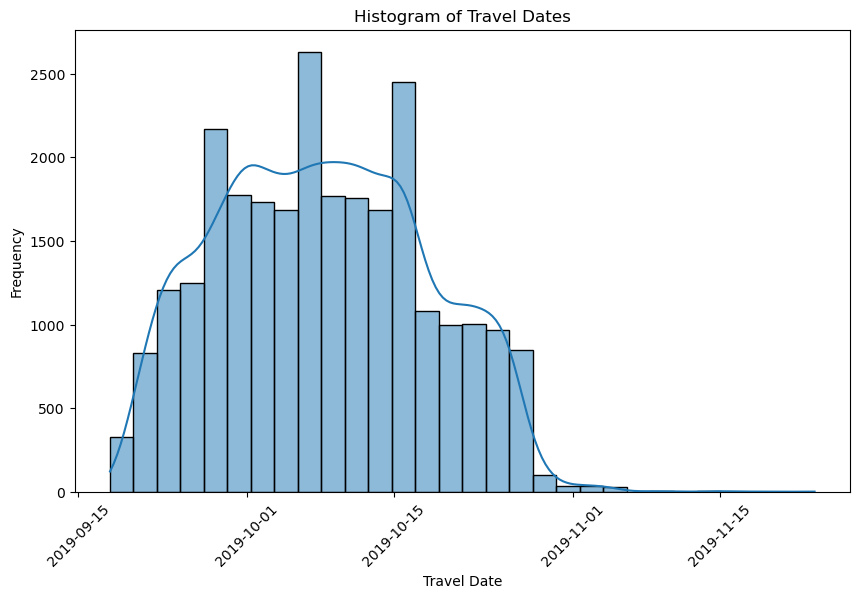

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Travel Date'], bins=30, kde=True)
plt.title('Histogram of Travel Dates')
plt.xlabel('Travel Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Inference from the plot**:

The histogram shows the distribution of travel dates, with the x-axis representing the travel dates and the y-axis representing the frequency (i.e., the number of occurrences) of these dates.

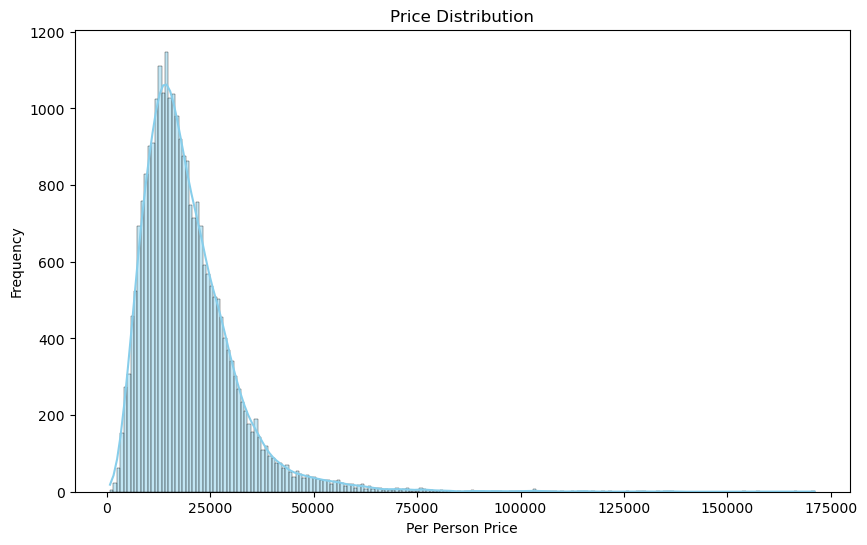

In [22]:
# Price Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Per Person Price'], kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Per Person Price')
plt.ylabel('Frequency')
plt.show()



**Inference from the plot**:
- The majority of the prices seem to be concentrated in a relatively narrow range, indicating a common price range for these travel packages.
- There is a long tail on the right side of the distribution, suggesting that there are a few travel packages with significantly higher prices compared to the majority.
- The distribution appears to be right-skewed, with prices tapering off as they increase.

Overall, this plot provides insight into the distribution of prices, which is valuable information for understanding the pricing structure of the travel packages in the dataset.

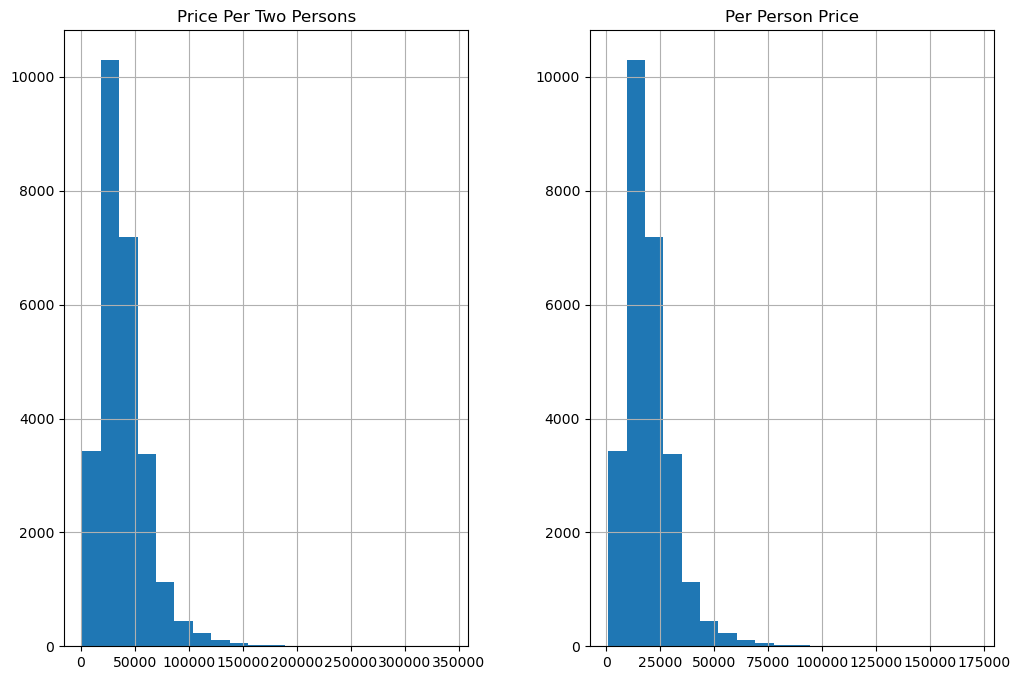

In [23]:
# Plot histograms for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.show()


**Inference from the plots**:

1. **Price Per Two Persons**: The distribution appears to be right-skewed, with a concentration of lower prices.

2. **Per Person Price**: This is  the target variable, and its distribution shows some variation with a peak around a certain price range.

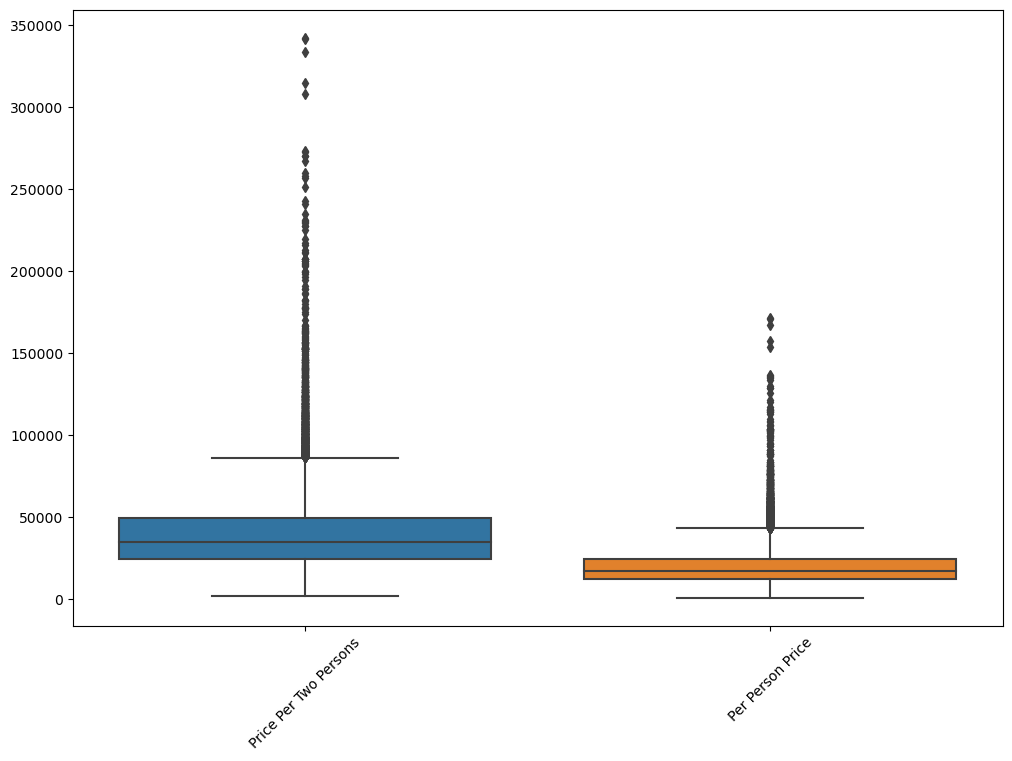

In [24]:
# Plot box plots for numeric columns to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.show()

**Inference from the plot**:

1. **Price Per Two Persons**: There are a few outliers with significantly higher prices than the majority of the packages.

2. **Per Person Price**: This variable has a similar distribution with some outliers on the higher price side.

These outliers might represent unusually expensive packages that should be examined further to determine if they are genuine data points or errors in the dataset.

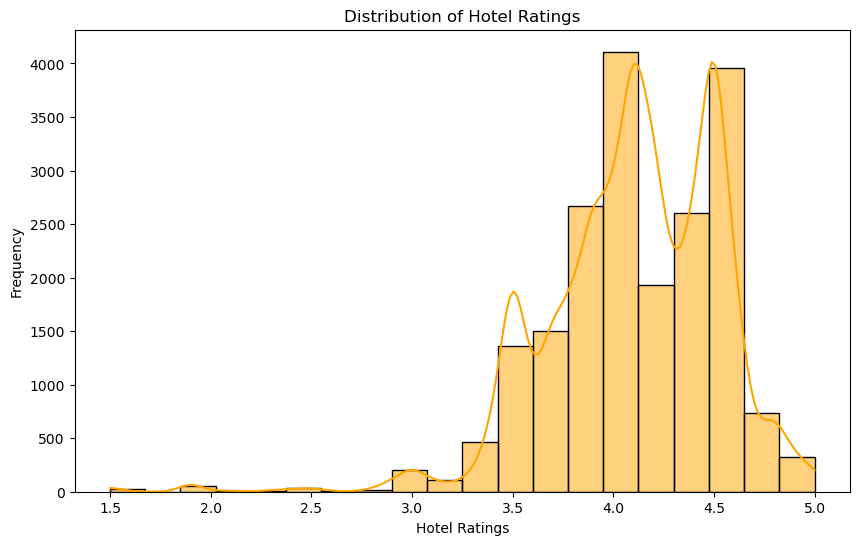

In [25]:
# Hotel Ratings Distribution

hotel_ratings = df['Hotel Details'].str.extract(r'(\d+\.\d+)')
hotel_ratings = pd.to_numeric(hotel_ratings[0], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(hotel_ratings, bins=20, kde=True, color='orange')
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Hotel Ratings')
plt.ylabel('Frequency')
plt.show()

**Inference from the plot**:

The distribution of hotel ratings in the dataset ranges from 0 to 5.0, with most ratings clustered around the 4.0 mark. The distribution is left-skewed, indicating that a higher frequency of hotels has received higher ratings, but there are also some lower ratings in the dataset.

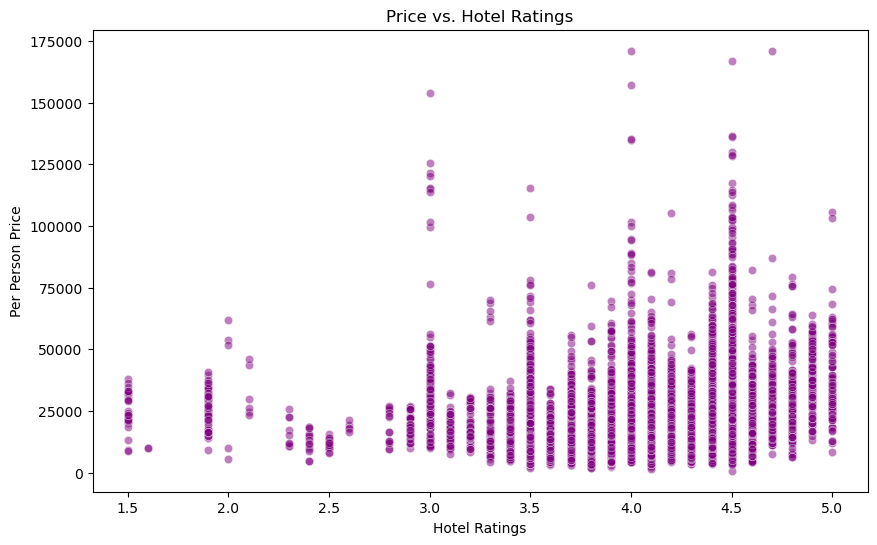

In [26]:
# Price vs. Hotel Ratings

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=hotel_ratings, y='Per Person Price', color='purple', alpha=0.5)
plt.title('Price vs. Hotel Ratings')
plt.xlabel('Hotel Ratings')
plt.ylabel('Per Person Price')
plt.show()



1. **Price vs. Hotel Ratings Plot**:
   - The plot examines the relationship between "Hotel Ratings" and "Per Person Price" for travel packages.
   - Each point represents a travel package, with its price on the y-axis and hotel ratings on the x-axis.

2. **Inference**:
   - There doesn't seem to be a strong linear correlation between hotel ratings and per person price.
   - Most data points are scattered across the plot, indicating that hotel ratings alone may not be a dominant factor in determining the price of travel packages.
   - However, there are some clusters of points, suggesting that specific rating ranges may have an impact on price within certain regions.

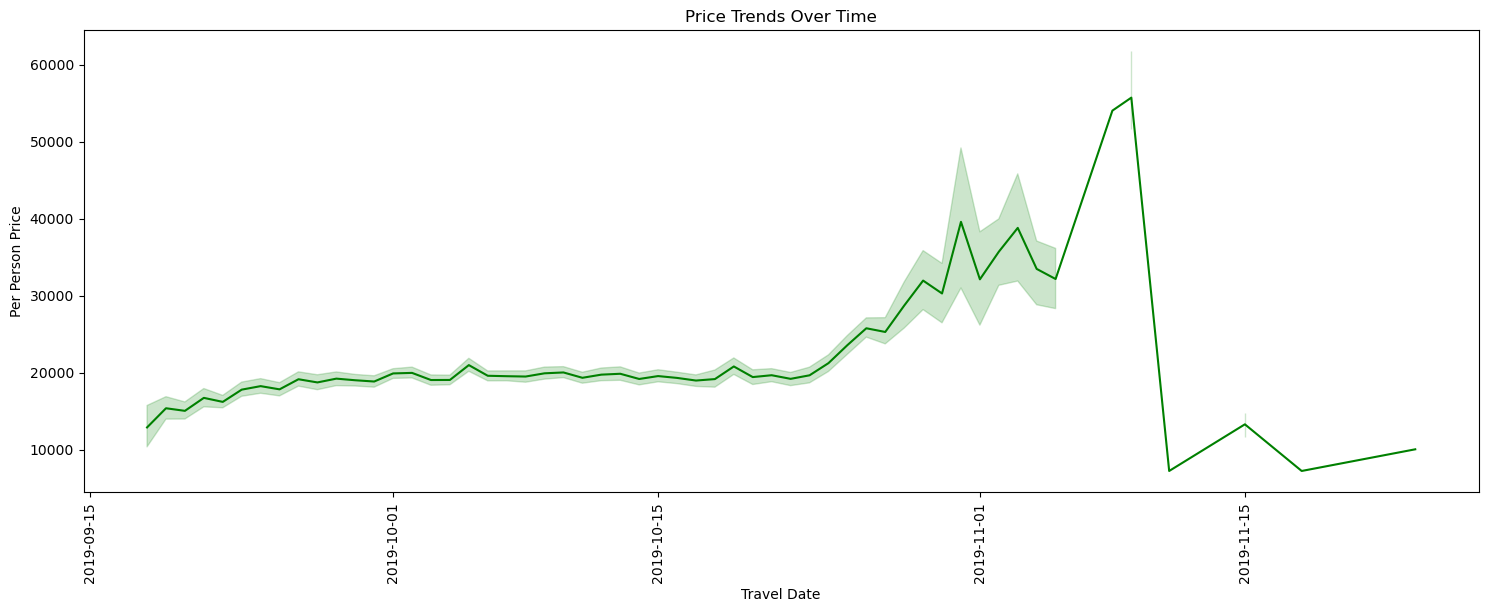

In [27]:
# Price vs. Travel Date

plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x='Travel Date', y='Per Person Price', color='green')
plt.title('Price Trends Over Time')
plt.xlabel('Travel Date')
plt.ylabel('Per Person Price')
plt.xticks(rotation=90)
plt.show()


**Inference from the plot**:

1. **Price Fluctuation**: The plot shows the relationship between "Per Person Price" and "Travel Date."

2. **Seasonal Patterns**: There appear to be fluctuations in prices over time, suggesting potential seasonal variations in travel costs.

3. **Need for Data Preprocessing**: The plot indicates that the data may not be entirely clean or properly structured, as there seem to be abrupt changes in price trends that might require further investigation and data preprocessing.

4. **Outliers**: There are some extreme price values visible, indicating the presence of outliers that may need to be addressed in the analysis.

5. **Overall Trend**: While there are fluctuations, it's challenging to identify a clear overall trend from this plot. Further statistical analysis may be necessary to uncover any significant patterns.

6. **Data Granularity**: The granularity of the "Travel Date" data could affect the interpretation, as it might be daily, monthly, or at some other interval.


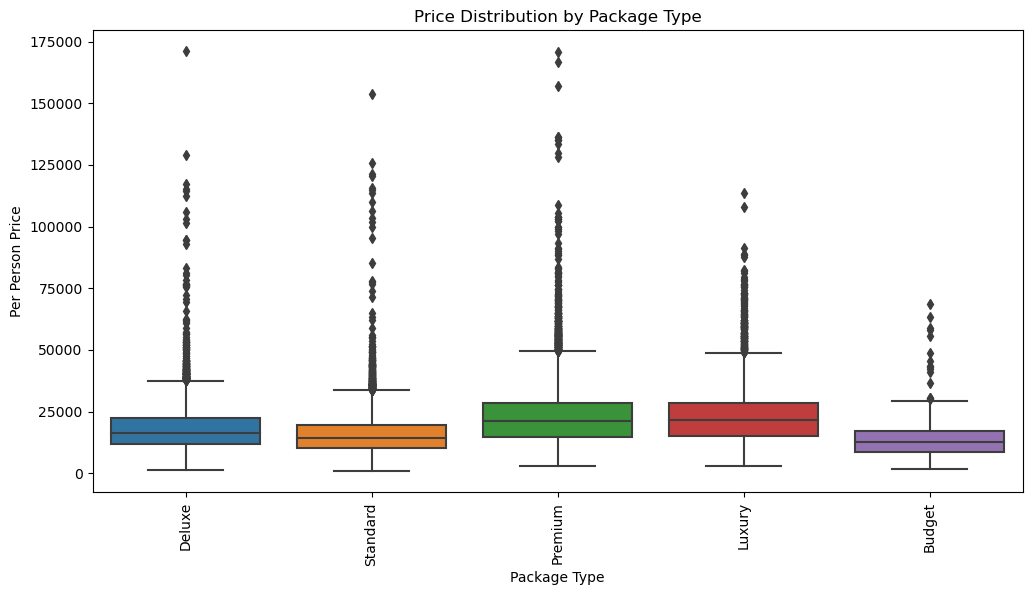

In [28]:
# Box Plots:
# Visualize the distribution of prices per package type:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Package Type', y='Per Person Price')
plt.xticks(rotation=90)
plt.xlabel('Package Type')
plt.ylabel('Per Person Price')
plt.title('Price Distribution by Package Type')
plt.show()

**Inference of the plot**:

1. **Variability**: The box plots reveal varying levels of price variability within different package types. Some package types have a wider range of prices (larger boxes), while others have narrower ranges (smaller boxes).

2. **Outliers**: Outliers, represented as individual points beyond the "whiskers" of the boxes, can be seen in several package types. These outliers indicate some extreme price values within those categories.

3. **Median Prices**: The horizontal line inside each box represents the median price for each package type. It's a quick way to compare the typical prices across different categories.

4. **Package Type Impact**: The plot provides a visual sense of how package type influences price distribution. Some package types consistently have higher or lower prices than others.

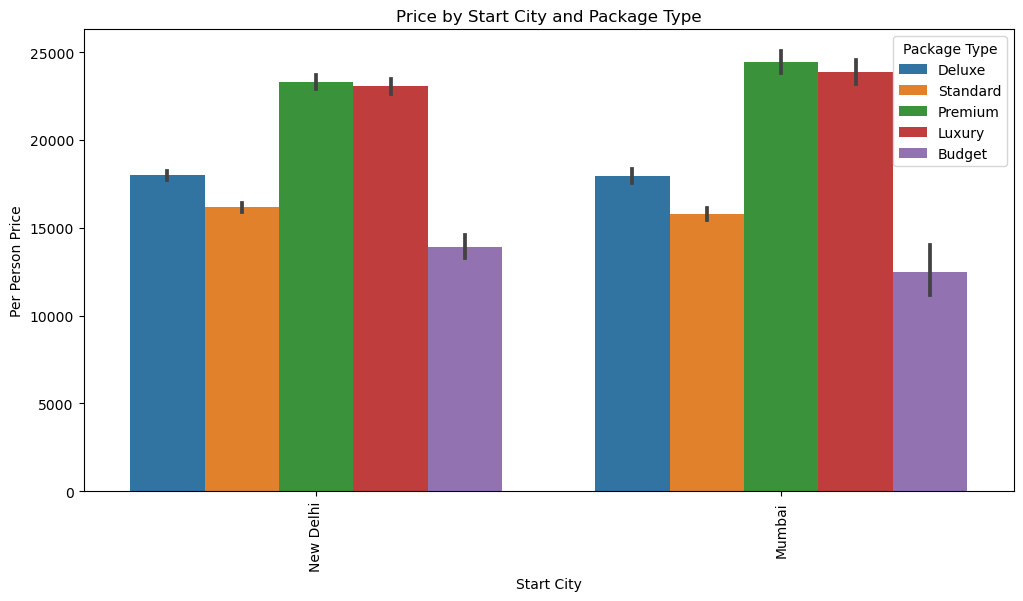

In [29]:
# Bar Plots:
# Explore the relationship between the start city and package types:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Start City', y='Per Person Price', hue='Package Type')
plt.xticks(rotation=90)
plt.xlabel('Start City')
plt.ylabel('Per Person Price')
plt.title('Price by Start City and Package Type')
plt.show()

**Inference of the plot**:

- The plot shows that there is a significant variation in "Per Person Price" based on both the "Start City" and "Package Type."
- Within each both cities, different package types also exhibit varying price levels.
- This information suggests that both the choice of start city and the selected package type influence the pricing of travel packages.

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


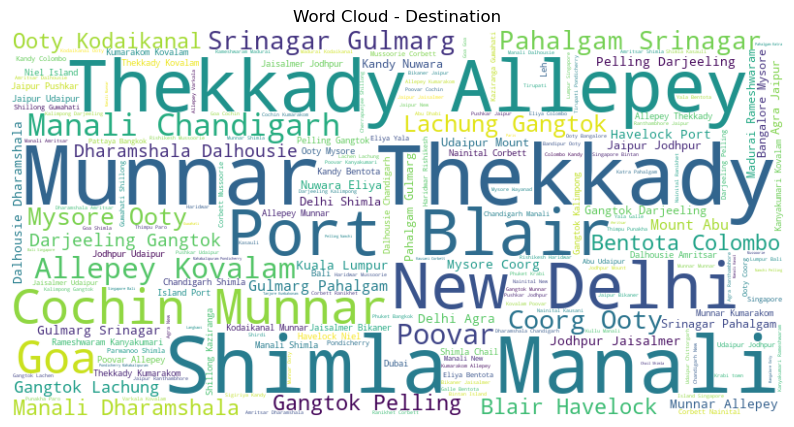

In [31]:
# Word Clouds:
# If you want to visualize common words in text columns like "Destination," you can create a word cloud:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Destination']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Destination')
plt.show()

**Inference from the plot**:

The word cloud plot for the "Destination" column visually represents the most common words found in the text data. From the plot, it appears that some of the frequently mentioned destinations include Shimla, Manali, Thekkady, Alleppey, Munnar, and New Delhi. These destinations seem to be popular or commonly mentioned in the dataset.

Package Type
Deluxe      7442
Standard    7196
Premium     7025
Luxury      4065
Budget       639
Name: count, dtype: int64


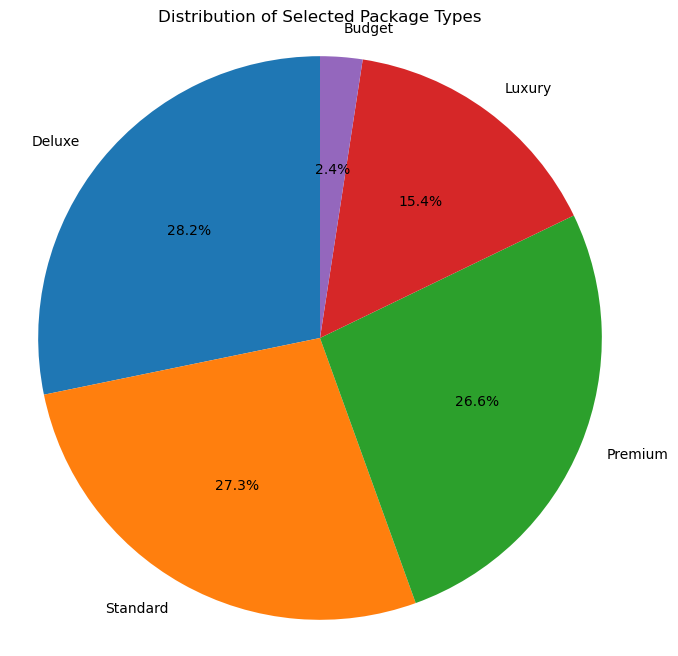

In [32]:
selected_package_types = ['Deluxe', 'Standard', 'Premium', 'Luxury', 'Budget']
filtered_df = df[df['Package Type'].isin(selected_package_types)]

# Get the counts of each package type
package_type_counts = filtered_df['Package Type'].value_counts()

# Display the counts of each class in 'Package Type'
print(package_type_counts)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(package_type_counts, labels=package_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Selected Package Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Inference from the plot**:

The pie chart illustrates the distribution of selected package types in the dataset. The data is categorized into five package types: Deluxe, Standard, Premium, Luxury, and Budget.

- Deluxe and Standard are the most common package types, each making up a significant portion of the dataset.
- Premium is also fairly common, but slightly less frequent than Deluxe and Standard.
- Luxury packages are less common but still represent a substantial portion of the dataset.
- Budget packages are the least common among the selected types, comprising a relatively small percentage of the dataset.

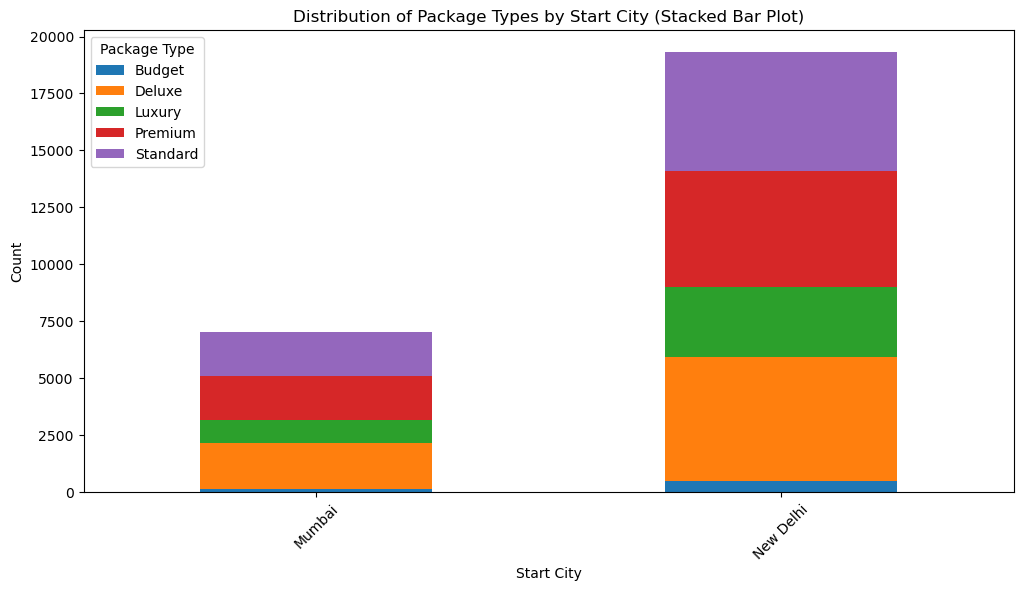

In [33]:
# Stacked Bar Plot:
# Show the distribution of package types by start city using a stacked bar plot:

city_package_counts = df.groupby(['Start City', 'Package Type']).size().unstack(fill_value=0)
city_package_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Start City')
plt.ylabel('Count')
plt.title('Distribution of Package Types by Start City (Stacked Bar Plot)')
plt.xticks(rotation=45)
plt.show()

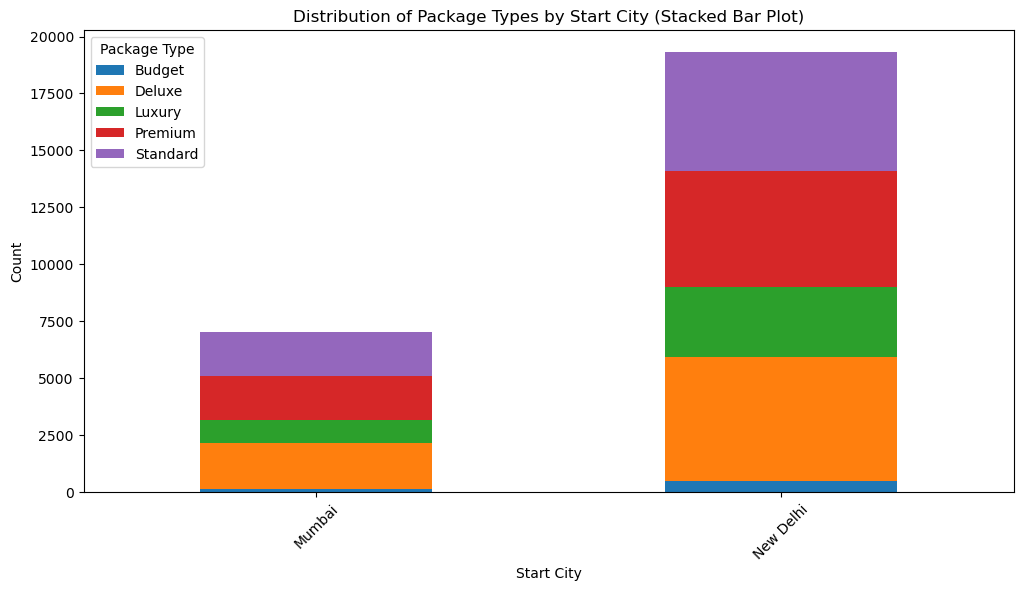

In [34]:
# Stacked Bar Plot:
# Show the distribution of package types by start city using a stacked bar plot:

city_package_counts = df.groupby(['Start City', 'Package Type']).size().unstack(fill_value=0)
city_package_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Start City')
plt.ylabel('Count')
plt.title('Distribution of Package Types by Start City (Stacked Bar Plot)')
plt.xticks(rotation=45)
plt.show()

**Inference from the plot:**

The stacked bar plot visualizes the distribution of package types by start city in the dataset.

- In each start city, the stacked bars represent the different package types (Deluxe, Standard, Premium, Luxury, Budget).
- For example, in New Delhi Deluxe and Standard packages are more prevalent
- This plot allows you to see how the distribution of package types varies across both start cities, providing insights into regional preferences for package types.

### **Feature Engineering**

In [35]:
df.columns

Index(['Uniq Id', 'Package Name', 'Page Url', 'Package Type', 'Destination',
       'Itinerary', 'Places Covered', 'Travel Date', 'Hotel Details',
       'Start City', 'Airline', 'Onwards Return Flight Time',
       'Price Per Two Persons', 'Per Person Price',
       'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

Add a new column `Hotel Ratings` by extracting ratings from `Hotel Details` Column

In [36]:
# Extracting hotel ratings from Hotel Details
df['Hotel Ratings'] = df['Hotel Details'].str.extract(r'(\d+\.\d+)')

# Convert 'Hotel Ratings' to numeric (float)
df['Hotel Ratings'] = pd.to_numeric(df['Hotel Ratings'], errors='coerce')

In [37]:
df['Hotel Ratings'].isnull().sum()

6236

**Mode Imputation**

As we can see there are few Null values in the column so we will be replacing them with the `mode` of the column

In [38]:
# Calculate the mode of the 'Hotel Ratings' column
mode_rating = df['Hotel Ratings'].mode()[0]
# Replace NaN values with the mode
df['Hotel Ratings'].fillna(mode_rating, inplace=True)
df['Hotel Ratings'].isnull().sum()

0

In [39]:
# Assuming your data is stored in a DataFrame called 'df'
df['Travel Date'] = pd.to_datetime(df['Travel Date'])
df['Travel_Year'] = df['Travel Date'].dt.year
df['Travel_Month'] = df['Travel Date'].dt.month
df['Travel_DayOfWeek'] = df['Travel Date'].dt.dayofweek

### **One-hot encoding**

In [40]:
# Example of one-hot encoding
df = pd.get_dummies(df, columns=['Package Type','Start City'])


In [41]:
df.head()

,Uniq Id,Package Name,Page Url,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Airline,Onwards Return Flight Time,...,Travel_Year,Travel_Month,Travel_DayOfWeek,Package Type_Budget,Package Type_Deluxe,Package Type_Luxury,Package Type_Premium,Package Type_Standard,Start City_Mumbai,Start City_New Delhi
0,0eaaee0a8a6ba47cfc9f6e6852fcf9f0,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Gangtok|Lachung|Gangtok|Darjeeling,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,2019-10-02,Lemon Tree Hotel Gangtok:4.2|Summit Alpine Re...,IndiGo,14 : 00-16 : 05,...,2019,10,2,False,True,False,False,False,False,True
1,c782c902e6d370153361d708bb2bca64,A Relaxing holiday to Kerala - Free Speed Boat...,https://holidayz.makemytrip.com/holidays/india...,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,2019-10-02,"Quality Airport Hotel:4.1|Hotel Hillview, Munn...",Spicejet|IndiGo,15 : 45-17 : 45|10 : 50-13 : 00,...,2019,10,2,False,False,False,False,True,True,False
2,1087ed9303d0ac724460088a5920065d,Experiential Manali from Chandigarh (Candid Ph...,https://holidayz.makemytrip.com/holidays/india...,Manali,3N Manali,Manali,2019-10-24,Not Available,Not Available,Not Available,...,2019,10,3,False,True,False,False,False,True,False
3,3bda4788836d573910f605154ba949dc,Stunning Kashmir Holiday,https://holidayz.makemytrip.com/holidays/india...,Gulmarg|Pahalgam|Srinagar,1N Gulmarg . 2N Pahalgam . 2N Srinagar,Gulmarg|Pahalgam|Srinagar,2019-10-26,Alpine Ridge:3.4|Hotel Hilltop:3.6|The Pride I...,IndiGo|IndiGo,06 : 30-09 : 10|12 : 45-14 : 20,...,2019,10,5,False,False,False,False,True,False,True
4,aab612682c998bde97e040b212cd5689,Best of Holiday in Himachal from Chandigarh,https://holidayz.makemytrip.com/holidays/india...,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,2N Shimla . 3N Manali . 2N Dharamshala . 2N Da...,Shimla|Manali|Dharamshala|Dalhousie|Chandigarh,2019-10-13,Not Available,Not Available,Not Available,...,2019,10,6,False,False,False,False,True,True,False


### **Handling outliers**

In [42]:
Q1 = df['Per Person Price'].quantile(0.25)
Q3 = df['Per Person Price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove outliers
df = df[(df['Per Person Price'] >= lower_bound) & (df['Per Person Price'] <= upper_bound)]


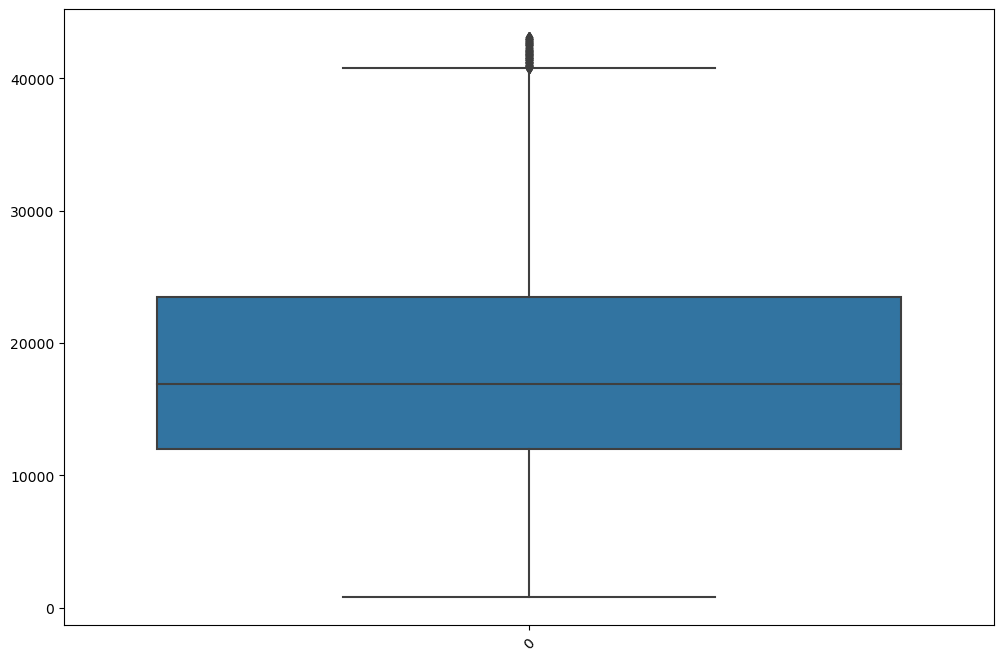

In [43]:
#Visualization after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['Per Person Price'])
plt.xticks(rotation=45)
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25411 entries, 0 to 27453
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     25411 non-null  object        
 1   Package Name                25411 non-null  object        
 2   Page Url                    25411 non-null  object        
 3   Destination                 25411 non-null  object        
 4   Itinerary                   25411 non-null  object        
 5   Places Covered              25411 non-null  object        
 6   Travel Date                 25411 non-null  datetime64[ns]
 7   Hotel Details               25411 non-null  object        
 8   Airline                     25411 non-null  object        
 9   Onwards Return Flight Time  25411 non-null  object        
 10  Price Per Two Persons       25411 non-null  int64         
 11  Per Person Price            25411 non-null  float64       


### **Feature Selection**

In [45]:
df.columns

Index(['Uniq Id', 'Package Name', 'Page Url', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Airline',
       'Onwards Return Flight Time', 'Price Per Two Persons',
       'Per Person Price', 'Sightseeing Places Covered', 'Cancellation Rules',
       'Hotel Ratings', 'Travel_Year', 'Travel_Month', 'Travel_DayOfWeek',
       'Package Type_Budget', 'Package Type_Deluxe', 'Package Type_Luxury',
       'Package Type_Premium', 'Package Type_Standard', 'Start City_Mumbai',
       'Start City_New Delhi'],
      dtype='object')

In [46]:
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                       Price Per Two Persons  Per Person Price  Hotel Ratings  \
Price Per Two Persons               1.000000          1.000000       0.029926   
Per Person Price                    1.000000          1.000000       0.029926   
Hotel Ratings                       0.029926          0.029926       1.000000   
Travel_Year                              NaN               NaN            NaN   
Travel_Month                        0.113159          0.113159       0.064191   
Travel_DayOfWeek                    0.006716          0.006716       0.001636   

                       Travel_Year  Travel_Month  Travel_DayOfWeek  
Price Per Two Persons          NaN      0.113159          0.006716  
Per Person Price               NaN      0.113159          0.006716  
Hotel Ratings                  NaN      0.064191          0.001636  
Travel_Year                    NaN           NaN               NaN  
Travel_Month                   NaN      1.000000         -0.031643  
Travel_DayOfWeek  

In [47]:

k = 10  # Replace with the desired number of top features
selected_features = correlation_matrix['Per Person Price'].abs().sort_values(ascending=False).index[2:k+1]


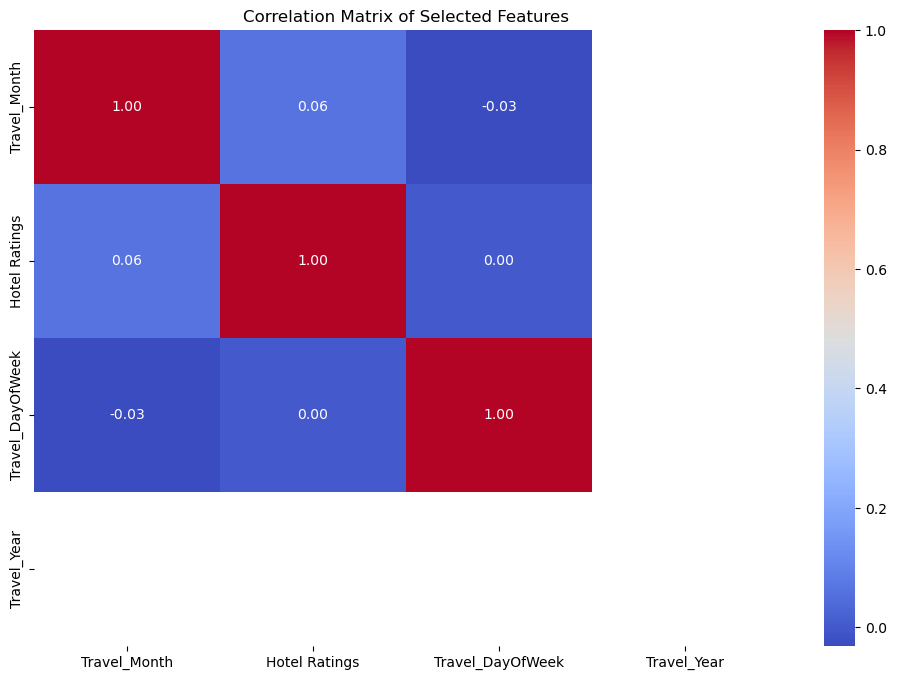

In [48]:
# Create a subset of the DataFrame with the selected features
subset_df = df[selected_features]

# Calculate the correlation matrix for the selected features
correlation_matrix = subset_df.corr()

# Set up the plot figure size
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
plt.title('Correlation Matrix of Selected Features')

# Show the plot
plt.show()

# Utilizing NLP


1. Initialize a Sentence Transformer model using a specific pre-trained model.
2. Specify a list of text-based columns to process.
3. For each text column, generate embeddings using the Sentence Transformer model.
4. Concatenate the generated embeddings into a single feature vector for further analysis.

This line of code sets up a Sentence Transformer model using a specific pre-trained version `('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6') ` that you can use to encode text into numerical representations for downstream NLP tasks.

In [49]:
!pip install sentence-transformers

  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/58/4b/922436953394e1bfda05e4bf1fe0e80f609770f256c59a9df7a9254f3e0d/sentence_transformers-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for transformers<5.0.0,>=4.34.0 from https://files.pythonhosted.org/packages/75/35/07c9879163b603f0e464b0f6e6e628a2340cfc7cdc5ca8e7d52d776710d4/transformers-4.44.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.7 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 43.7/43.7 kB 530.4 kB/s eta 0:00:00
  Obtaining dependency information for torch>=1.11.0 from https://files.pythonhosted.org/packages/18/cf/f69dff972a748e08e1bf602ef94ea5c6d4dd2f41cea22c8ad67a607d8b41/torch-2.4.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for huggingface-hub>=0.15.1 from https://files.pythonhosted.org/packa

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2024.6.1 which is incompatible.


In [50]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Initialize the SentenceTransformer model
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

C:\Users\aniru\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\aniru\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aniru\.cache\huggingface\hub\models--flax-sentence-embeddings--all_datasets_v4_MiniLM-L6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

C:\Users\aniru\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [51]:
# Encode text-based columns and create embeddings
text_columns = ['Package Name', 'Destination', 'Itinerary', 'Places Covered', 'Hotel Details', 'Airline', 'Sightseeing Places Covered', 'Cancellation Rules']

for column in text_columns:
    df[column + '_embedding'] = df[column].apply(lambda text: model.encode(text))

# Concatenate the embeddings into a single feature vector
text_embeddings = df[text_columns].values.tolist()

**Saving the encoded data, to be used later:**

In [53]:
df.to_csv('Embedded_.csv', index=False)

### **Dimensionality Reduction with PCA**


1. **PCA Initialization**:
   - Initializing PCA (Principal Component Analysis) with a specified number of components (23 in this case). PCA is used to reduce the dimensionality of the text embeddings.

2. **Creating an Empty Array for PCA-Transformed Embeddings**:

   - Creating an empty NumPy array to store the PCA-transformed text embeddings. The array will have dimensions `(number_of_rows, n_components * number_of_text_columns)`.

3. **Looping Through Text Columns and Applying PCA**:

   - This loop iterates over the specified text columns (e.g., 'Package Name', 'Destination', etc.).
   - For each column, it extracts the text embeddings stored in the DataFrame as lists.
   - PCA is applied to these embeddings to reduce their dimensionality to the specified number of components (23).
   - The PCA-transformed embeddings are then stored in the `text_embeddings_pca` array.

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

#  Apply PCA separately to each text embedding column
n_components = 23  # Adjust the number of components as needed
pca = PCA(n_components=n_components)

# Create an empty array to store the PCA-transformed embeddings
text_embeddings_pca = np.empty((len(df), n_components * len(text_columns)))

for i, column in enumerate(text_columns):
    embeddings = df[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

# Combine text embeddings with other numerical features if available
numerical_features = [
    'Package Type_Standard', 'Package Type_Premium', 'Package Type_Luxury',
    'Travel_Month', 'Package Type_Budget', 'Package Type_Deluxe',
    'Hotel Ratings', 'Start City_New Delhi', 'Start City_Mumbai',
    'Travel_DayOfWeek', 'Travel_Year'
]

#saving the pca analysis
import joblib
joblib.dump(pca, 'pca.joblib')

['pca.joblib']

In [56]:
X_numerical = df[numerical_features].values

# Combine PCA-transformed text embeddings and numerical features
X = np.hstack((text_embeddings_pca, X_numerical))
# Target variable
y = df['Per Person Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#saving the pca model
import joblib
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

### **Model Creation and Training**

**Linear Regression model**

Mean Absolute Error (MAE): 3189.9763205084646
Mean Squared Error (MSE): 18600242.721433144
Root Mean Squared Error (RMSE): 4312.799870320108
R-squared (R2): 0.7367754386988274


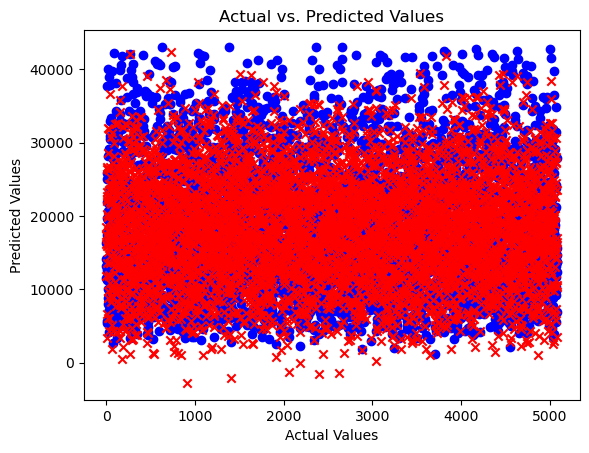

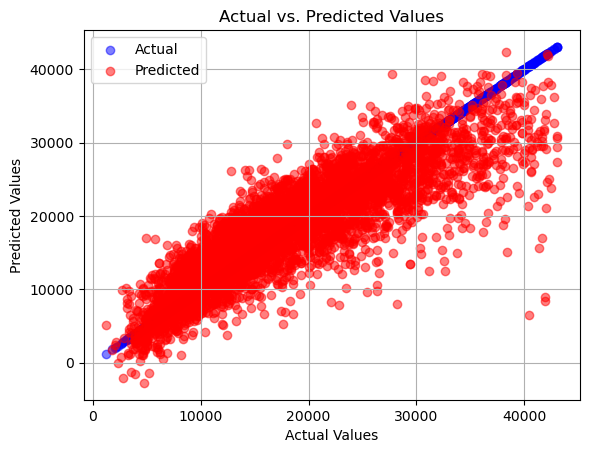

In [57]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [59]:
#Saving the LR model
import pickle
with open('linear_reg_latest.pkl', 'wb') as file:
    pickle.dump(model, file)

In [61]:
import joblib
joblib.dump(model, 'lr_model.joblib')

['lr_model.joblib']

**Decision Tree**

Mean Squared Error (MSE): 16678534.870954653
Root Mean Squared Error (RMSE): 4083.936198198333
Mean Absolute Error (MAE): 2589.9422093252015
R-squared (R2) Score: 0.7639708206874903


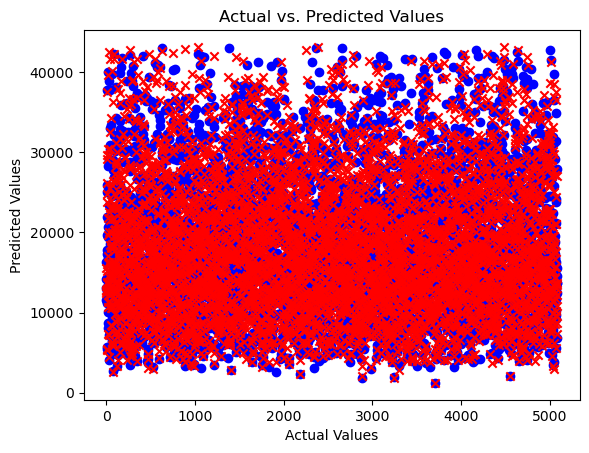

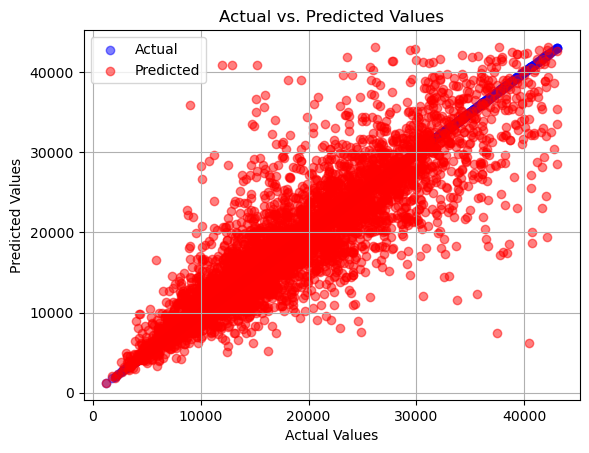

In [62]:
# Initialize the Decision Tree Regressor model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [63]:
#Saving the DT model
import pickle
with open('decision_tree_reg_latest.pkl', 'wb') as file:
    pickle.dump(decision_tree_reg, file)

In [64]:
import joblib
joblib.dump(decision_tree_reg, 'decision_tree_reg_latest.joblib')

['decision_tree_reg_latest.joblib']

**Random Forest**

Mean Absolute Error (MAE): 2784.7789923497717
Mean Squared Error (MSE): 15108293.67703501
Root Mean Squared Error (RMSE): 3886.938856868604
R-squared (R2): 0.7861923613198741


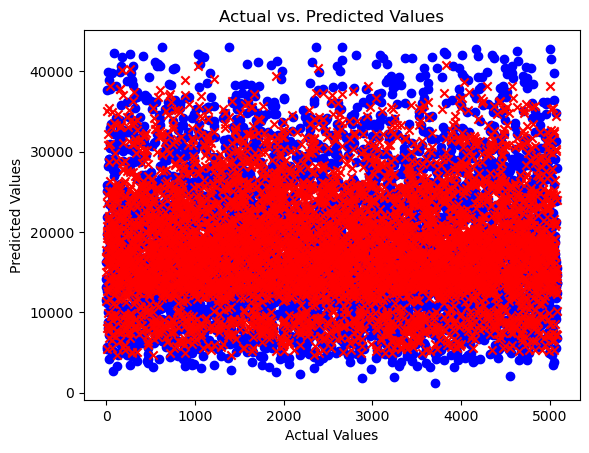

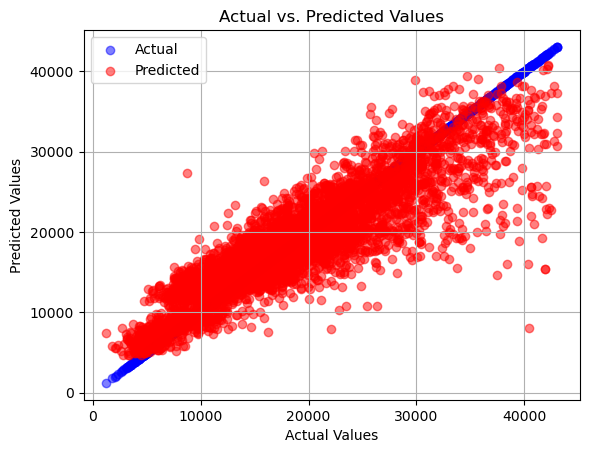

In [67]:
# Create and train the Linear Regression model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split= 2, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Assuming y_test contains the actual values and y_pred contains the predicted values

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [68]:
#Saving the RF model
import pickle
with open('rf_latest.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [69]:
import joblib
joblib.dump(rf_model, 'rf_latest.joblib')

['rf_latest.joblib']

### **Hyperparamter Tuning**

In [70]:
# Linear Regression Hyperparameter Tuning
linear_reg = LinearRegression()

# Define hyperparameters and their potential values
param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create a GridSearchCV object for Linear Regression
grid_search_linear = GridSearchCV(linear_reg, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train, y_train)

# Get the best hyperparameters for Linear Regression
best_linear_reg = grid_search_linear.best_estimator_

In [71]:
# Decision Tree Regressor Hyperparameter Tuning
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Define hyperparameters and their potential values
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object for Decision Tree Regressor
grid_search_decision_tree = GridSearchCV(decision_tree_reg, param_grid_decision_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_decision_tree.fit(X_train, y_train)

# Get the best hyperparameters for Decision Tree Regressor
best_decision_tree_reg = grid_search_decision_tree.best_estimator_


C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\aniru\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aniru\anaconda3\Lib\site-packag

In [72]:
# Random Forest Regression Hyperparameter Tuning
random_forest_reg = RandomForestRegressor(random_state=42)

# Define hyperparameters and their potential values
param_grid_rf = {
    # 'n_estimators': [50, 100, 150],
    # 'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object for Random Forest Regression
grid_search_rf = GridSearchCV(random_forest_reg, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest Regression
best_rf_reg = grid_search_rf.best_estimator_


### **Model Evaluation**

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test data using the best models
y_pred_lr = best_linear_reg.predict(X_test)
y_pred_decision_tree = best_decision_tree_reg.predict(X_test)
y_pred_rf = best_rf_reg.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_lr)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_lr)
r2_linear = r2_score(y_test, y_pred_lr)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate adjusted R-squared for linear regression
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_linear = 1 - ((1 - r2_linear) * (n - 1) / (n - p - 1))

# Calculate adjusted R-squared for decision tree regressor
adj_r2_decision_tree = 1 - ((1 - r2_decision_tree) * (n - 1) / (n - p - 1))

# Calculate adjusted R-squared for random forest regression
adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))

print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print("R-squared (R2) Score:", r2_linear)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_linear)

print("\nDecision Tree Regressor:")
print("Mean Squared Error (MSE):", mse_decision_tree)
print("Root Mean Squared Error (RMSE):", rmse_decision_tree)
print("Mean Absolute Error (MAE):", mae_decision_tree)
print("R-squared (R2) Score:", r2_decision_tree)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_decision_tree)

print("\nRandom Forest Regression:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2) Score:", r2_rf)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_rf)


Linear Regression:
Mean Squared Error (MSE): 31895147.451779358
Root Mean Squared Error (RMSE): 5647.578901775464
Mean Absolute Error (MAE): 4380.550204763387
R-squared (R2) Score: 0.5486302882512089
Adjusted R-squared (Adj R2) Score: 0.5306198332090533

Decision Tree Regressor:
Mean Squared Error (MSE): 19350456.106207963
Root Mean Squared Error (RMSE): 4398.915332921056
Mean Absolute Error (MAE): 3019.168966560459
R-squared (R2) Score: 0.7261586638509343
Adjusted R-squared (Adj R2) Score: 0.7152319070371287

Random Forest Regression:
Mean Squared Error (MSE): 8998863.921939
Root Mean Squared Error (RMSE): 2999.8106476807834
Mean Absolute Error (MAE): 2013.399218499105
R-squared (R2) Score: 0.8726510162508873
Adjusted R-squared (Adj R2) Score: 0.8675695650883997


In [74]:
import pandas as pd

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'Adj R2'])

# Add values for Linear Regression
metrics_df = metrics_df.append({
    'Model': 'Linear Regression',
    'MSE': round(mse_linear, 2),
    'RMSE': round(rmse_linear, 2),
    'MAE': round(mae_linear, 2),
    'R2': round(r2_linear, 2),
    'Adj R2': round(adj_r2_linear, 2)
}, ignore_index=True)

# Add values for Decision Tree Regressor
metrics_df = metrics_df.append({
    'Model': 'Decision Tree Regressor',
    'MSE': round(mse_decision_tree, 2),
    'RMSE': round(rmse_decision_tree, 2),
    'MAE': round(mae_decision_tree, 2),
    'R2': round(r2_decision_tree, 2),
    'Adj R2': round(adj_r2_decision_tree, 2)
}, ignore_index=True)

# Add values for Random Forest Regression
metrics_df = metrics_df.append({
    'Model': 'Random Forest Regression',
    'MSE': round(mse_rf, 2),
    'RMSE': round(rmse_rf, 2),
    'MAE': round(mae_rf, 2),
    'R2': round(r2_rf, 2),
    'Adj R2': round(adj_r2_rf, 2)
}, ignore_index=True)

# Display the DataFrame
metrics_df


AttributeError: 'DataFrame' object has no attribute 'append'

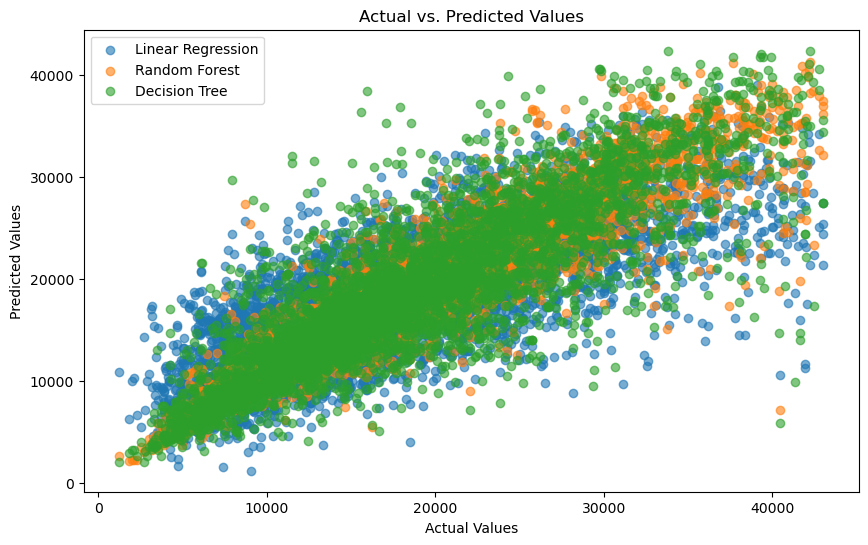

In [75]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)

# Random Forest Regressor
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6)

# Decision Tree Regressor
plt.scatter(y_test, y_pred_decision_tree, label='Decision Tree', alpha=0.6)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


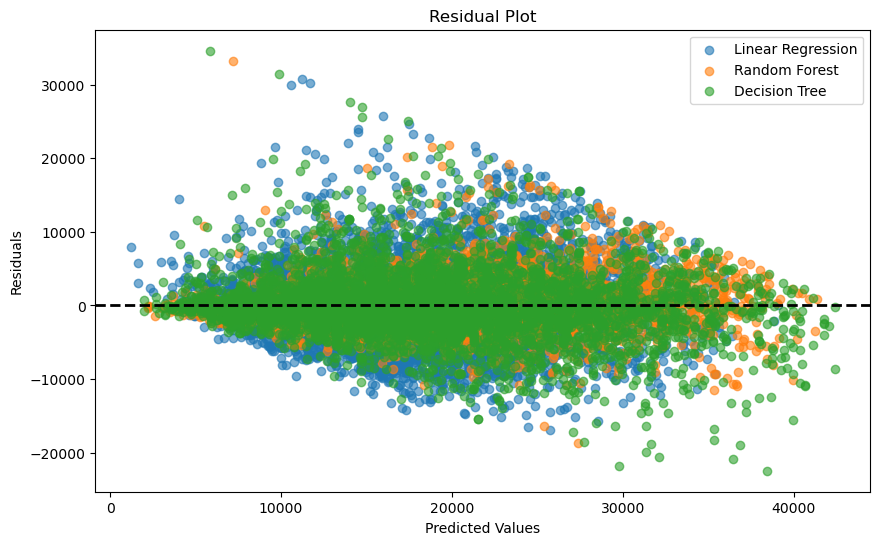

In [76]:
plt.figure(figsize=(10, 6))

# Linear Regression Residuals
residuals_lr = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals_lr, label='Linear Regression', alpha=0.6)

# Random Forest Regressor Residuals
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, label='Random Forest', alpha=0.6)

# Decision Tree Regressor Residuals
residuals_dt = y_test - y_pred_decision_tree
plt.scatter(y_pred_decision_tree, residuals_dt, label='Decision Tree', alpha=0.6)

plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()


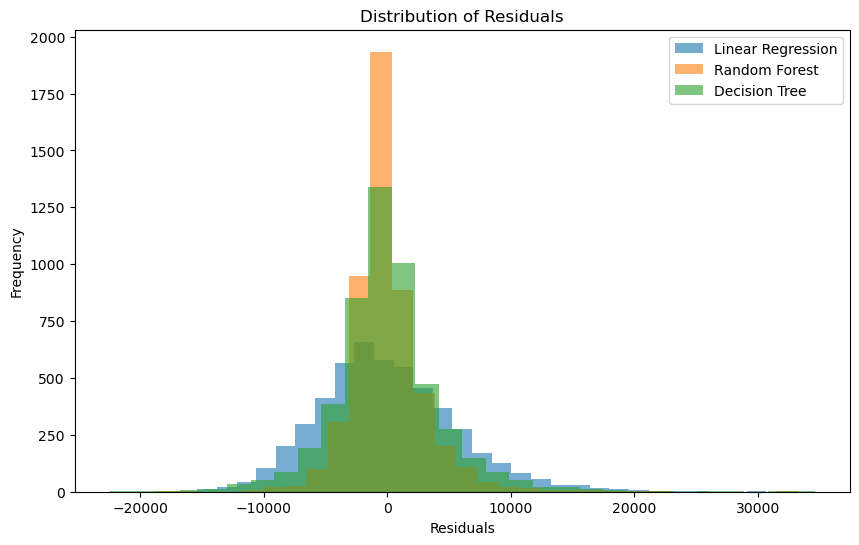

In [77]:
plt.figure(figsize=(10, 6))

# Linear Regression Residuals Distribution
plt.hist(residuals_lr, bins=30, alpha=0.6, label='Linear Regression')

# Random Forest Regressor Residuals Distribution
plt.hist(residuals_rf, bins=30, alpha=0.6, label='Random Forest')

# Decision Tree Regressor Residuals Distribution
plt.hist(residuals_dt, bins=30, alpha=0.6, label='Decision Tree')

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()
